In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.2 MB/s eta 0:00:00


# Utils

In [9]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap = 'gray')
        plt.axis('off')

In [10]:
def plot_image(image, nth, title, row = 1):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

#6.1 Pyramids

## practice 5.1.1

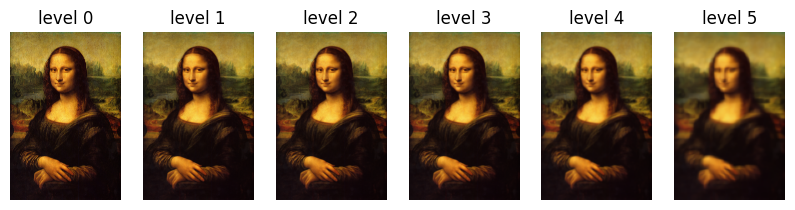

In [11]:
# read image
mona_image = cv2.imread("mona lisa.jpg")

layer = mona_image.copy()
gaussian_pyramid = [layer]

# Build 5 levels of the Gaussian Pyramid
for i in range(5):
    layer = cv2.GaussianBlur(layer, (0,0), 1)
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)

# Display each level of the Gaussian Pyramid
imshow(gaussian_pyramid,
       title=["level 0","level 1","level 2","level 3","level 4","level 5"])

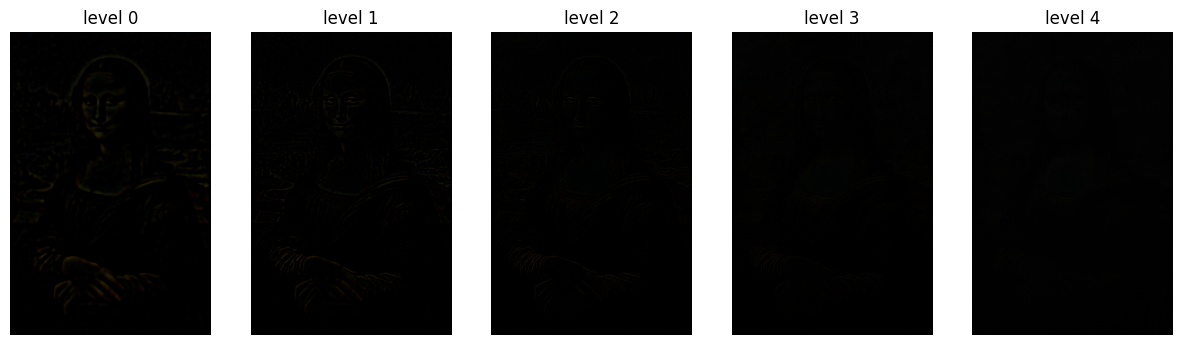

In [12]:
laplacian_pyramid = []
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=gaussian_pyramid[i-1].shape[:2][::-1])
    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)

# Display each level of the Laplacian Pyramid
imshow(laplacian_pyramid,figsize=15,
       title=["level 0","level 1","level 2","level 3","level 4"])

## practice 5.1.2

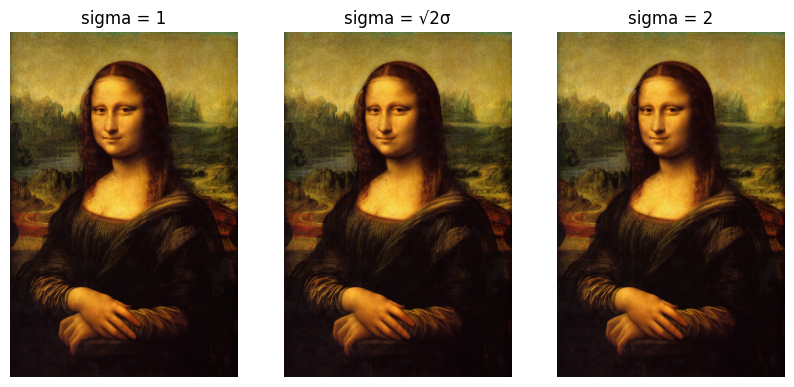

In [6]:
# gaussian filter with sigma
def gaussian_smoothing(image, sigma):
    # construct kernel
    size = int(4 * sigma + 1)
    kernel = cv2.getGaussianKernel(size, sigma)
    kernel = np.dot(kernel, kernel.T)

    return cv2.filter2D(image, -1, kernel)

def gaussian_pyramid(image):
    filtered1 = gaussian_smoothing(image, sigma=1)
    filtered2 = gaussian_smoothing(filtered1, sigma=np.sqrt(2))
    filtered3 = gaussian_smoothing(filtered2, sigma=2)
    return [filtered1, filtered2, filtered3]

image = cv2.imread("mona lisa.jpg")
output = gaussian_pyramid(image)
imshow(output, title= ["sigma = 1", "sigma = √2σ", "sigma = 2"])

## practice 5.1.3

In [7]:
import math

def max_levels(n):
    return int(round(math.log(n, 2)))

def total_pixels(n):
    max = max_levels(n)
    return n * n * (2**(2*max) - 1) // 3

# For example
J = 5
N = 2 ** J

print(f"Max levels of gaussian pyramid with n = {N} is: {max_levels(N)}")
print(f"Count of all pixels in all levels in gaussian pyramid with n = {N} is: {total_pixels(N)}")

Max levels of gaussian pyramid with n = 32 is: 5
Count of all pixels in all levels in gaussian pyramid with n = 32 is: 349184


## practice 5.1.4

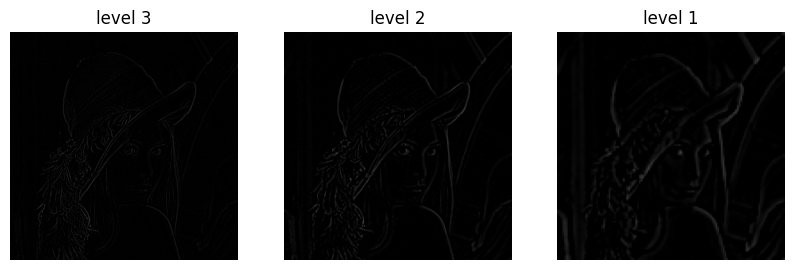

In [13]:
# Load image
lena_image = cv2.imread("Lena.bmp", cv2.IMREAD_GRAYSCALE)

# Compute the approximation pyramid
approx_pyramid = [lena_image]
for i in range(2):
    h, w = approx_pyramid[-1].shape[:2]
    downsampled = cv2.resize(approx_pyramid[-1], (w // 2, h // 2), interpolation=cv2.INTER_NEAREST)
    approx_pyramid.append(downsampled)

# Calculate the Gaussian pyramid of the image
gaussian_pyramid = [lena_image]
levels = 3
for i in range(levels):
    lena_image = cv2.pyrDown(lena_image)
    gaussian_pyramid.append(lena_image)

# Calculate the prediction residual pyramid
residual_pyramid = []
for i in range(levels, 0, -1):
    upscaled_img = cv2.pyrUp(gaussian_pyramid[i], dstsize=gaussian_pyramid[i-1].shape[1::-1])
    residual = cv2.subtract(gaussian_pyramid[i-1], upscaled_img)
    residual_pyramid.append(residual)

imshow(residual_pyramid[::-1], title = ["level 3","level 2", "level 1"])


## practice 5.1.5

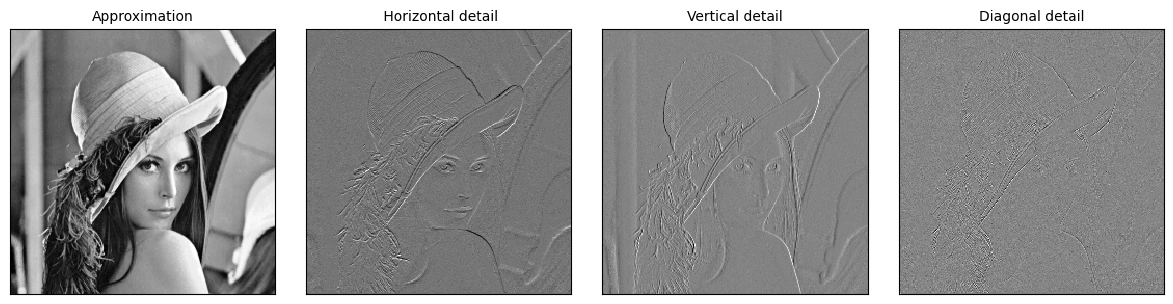

In [16]:
import pywt
import pywt.data

# Load image
lena_image = cv2.imread("Lena.bmp", cv2.IMREAD_GRAYSCALE)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(lena_image, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

## practice 5.1.6

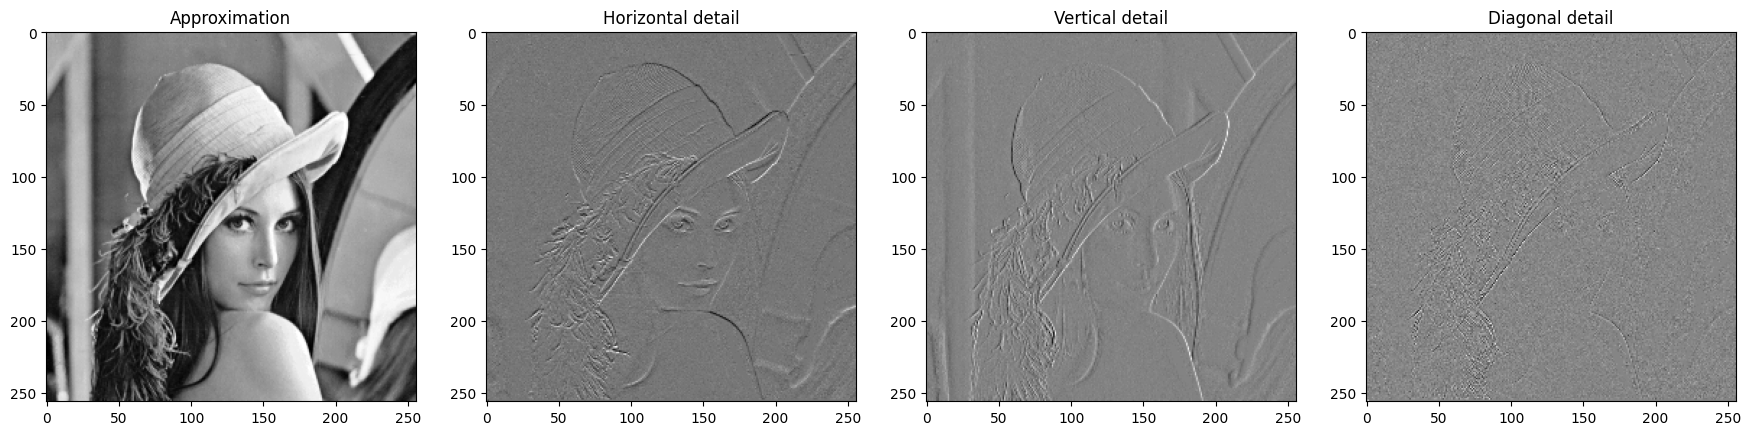

In [18]:
def quantize_wavelet_coeffs(wavelet_coeffs, 𝛾):
    wavelet_coeffs = np.array(wavelet_coeffs, dtype=object)

    for i in range(len(wavelet_coeffs)):
      for j in range(len(wavelet_coeffs[i])):
        for k in range(len(wavelet_coeffs[i][j])):
          px = wavelet_coeffs[i][j][k]
          wavelet_coeffs[i][j][k] = np.round(abs(px) / 𝛾) * np.sign(px) * 𝛾


    return wavelet_coeffs


img = cv2.imread('Lena.bmp', cv2.IMREAD_GRAYSCALE)
quantized_coeffs = quantize_wavelet_coeffs(coeffs2, 2)

plot_image(quantized_coeffs[0], 1, 'Approximation')
plot_image(quantized_coeffs[1][0], 2, 'Horizontal detail')
plot_image(quantized_coeffs[1][1], 3, 'Vertical detail')
plot_image(quantized_coeffs[1][2], 4, 'Diagonal detail')

